# Восстановление золота из руды

Необходимо подготовить прототип модели машинного обучения для компании. Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Имеются данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Нам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Загрузка-данных-и-просмотр-информации" data-toc-modified-id="Загрузка-данных-и-просмотр-информации-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Загрузка данных и просмотр информации</a></span></li><li><span><a href="#Проверка-рассчёта-эффективности-обогащения" data-toc-modified-id="Проверка-рассчёта-эффективности-обогащения-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Проверка рассчёта эффективности обогащения</a></span></li><li><span><a href="#Анализ-признаков-недоступных-в-тестовой-выборке" data-toc-modified-id="Анализ-признаков-недоступных-в-тестовой-выборке-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Анализ признаков недоступных в тестовой выборке</a></span></li><li><span><a href="#Заполнение-пропусков" data-toc-modified-id="Заполнение-пропусков-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Заполнение пропусков</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Динамика-изменений-концентрации-металлов-на-разных-этапах-очистки" data-toc-modified-id="Динамика-изменений-концентрации-металлов-на-разных-этапах-очистки-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Динамика изменений концентрации металлов на разных этапах очистки</a></span><ul class="toc-item"><li><span><a href="#Золото" data-toc-modified-id="Золото-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Золото</a></span></li><li><span><a href="#Серебро" data-toc-modified-id="Серебро-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Серебро</a></span></li><li><span><a href="#Свинец" data-toc-modified-id="Свинец-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Свинец</a></span></li></ul></li><li><span><a href="#Распределение-размеров-гранул-сырья" data-toc-modified-id="Распределение-размеров-гранул-сырья-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Распределение размеров гранул сырья</a></span></li><li><span><a href="#Суммарная-концентрация-всех-веществ" data-toc-modified-id="Суммарная-концентрация-всех-веществ-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Суммарная концентрация всех веществ</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Функция-для-подсчёта-метрики-sMAPE" data-toc-modified-id="Функция-для-подсчёта-метрики-sMAPE-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Функция для подсчёта метрики sMAPE</a></span></li><li><span><a href="#Создание-обучающих-и-тестовых-выборок" data-toc-modified-id="Создание-обучающих-и-тестовых-выборок-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Создание обучающих и тестовых выборок</a></span></li><li><span><a href="#Обучение-и-проверка-моделей" data-toc-modified-id="Обучение-и-проверка-моделей-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Обучение и проверка моделей</a></span><ul class="toc-item"><li><span><a href="#DummyRegressor()" data-toc-modified-id="DummyRegressor()-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span><code>DummyRegressor()</code></a></span></li><li><span><a href="#LinearRegression()" data-toc-modified-id="LinearRegression()-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span><code>LinearRegression()</code></a></span></li><li><span><a href="#DecisionTreeRegressor()" data-toc-modified-id="DecisionTreeRegressor()-3.3.3"><span class="toc-item-num">3.3.3&nbsp;&nbsp;</span><code>DecisionTreeRegressor()</code></a></span></li><li><span><a href="#RandomForestRegressor()" data-toc-modified-id="RandomForestRegressor()-3.3.4"><span class="toc-item-num">3.3.4&nbsp;&nbsp;</span><code>RandomForestRegressor()</code></a></span></li></ul></li><li><span><a href="#Проверка-на-тестовых-данных" data-toc-modified-id="Проверка-на-тестовых-данных-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Проверка на тестовых данных</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

## Подготовка данных

Для начала, импортируем все необходимые модули для проекта.

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.dummy import DummyRegressor

Зафиксируем в константе случайное состояние, которое будем использовать в проекте.

In [2]:
RANDOM_STATE = 322

### Загрузка данных и просмотр информации

Загрузим все таблицы в три переменные. В тренировочных данных находятся все обучающие и целевые признаки для обучения модели. Из этих же данных мы будем брать валидационную выборку для проверки качества модели, так как оценивать качество будем методом кросс-валидации. В тестовых данных находятся только обучающие признаки: соответствующие им целевые признаки мы будем брать из таблицы `data_full`.

In [3]:
data_train = pd.read_csv('gold_industry_train.csv')
data_test = pd.read_csv('gold_industry_test.csv')
data_full = pd.read_csv('gold_industry_full.csv')

Выведем первые строки и информацию о данных, чтобы примерно понять, что из себя представляют данные:

In [4]:
data_train.head(3)

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
0,2016-01-15 00:00:00,6.486150,6.100378,2.284912,36.808594,523.546326,55.486599,11.986616,6.007990,999.706909,...,8.764648,42.192020,6.055403,9.889648,5.507324,70.541216,2.143149,10.411962,0.895447,16.904297
1,2016-01-15 01:00:00,6.478583,6.161113,2.266033,35.753385,525.290581,57.278666,11.971193,6.005766,1000.286398,...,9.001494,42.701629,6.029369,9.968944,5.257781,69.266198,2.224930,10.462676,0.927452,16.634514
2,2016-01-15 02:00:00,6.362222,6.116455,2.159622,35.971630,530.026610,57.510649,11.920603,6.197377,999.719565,...,8.842896,42.657501,6.055926,10.213995,5.383759,68.116445,2.257889,10.507046,0.953716,16.208849


In [5]:
data_test.head(3)

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2017-12-09 14:59:59,4.365491,6.158718,3.875727,39.135119,555.820208,94.544358,6.146982,9.308612,1196.238112,...,23.018622,-500.492702,20.020205,-500.220296,17.963512,-499.939490,12.990306,-500.080993,19.990336,-499.191575
1,2017-12-09 15:59:59,4.362781,6.048130,3.902537,39.713906,544.731687,123.742430,6.210119,9.297709,1201.904177,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471
2,2017-12-09 16:59:59,5.081681,6.082745,4.564078,37.208683,558.155110,82.610855,7.363824,9.003562,1200.826926,...,22.993827,-501.559663,20.029144,-500.000662,18.012723,-500.024764,13.016445,-500.058432,19.973767,-501.394155


In [6]:
data_full.head(3)

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
0,2016-01-15 00:00:00,6.486150,6.100378,2.284912,36.808594,523.546326,55.486599,11.986616,6.007990,999.706909,...,8.764648,42.192020,6.055403,9.889648,5.507324,70.541216,2.143149,10.411962,0.895447,16.904297
1,2016-01-15 01:00:00,6.478583,6.161113,2.266033,35.753385,525.290581,57.278666,11.971193,6.005766,1000.286398,...,9.001494,42.701629,6.029369,9.968944,5.257781,69.266198,2.224930,10.462676,0.927452,16.634514
2,2016-01-15 02:00:00,6.362222,6.116455,2.159622,35.971630,530.026610,57.510649,11.920603,6.197377,999.719565,...,8.842896,42.657501,6.055926,10.213995,5.383759,68.116445,2.257889,10.507046,0.953716,16.208849


In [7]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14579 entries, 0 to 14578
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14579 non-null  object 
 1   rougher.input.feed_au                               14579 non-null  float64
 2   rougher.input.feed_ag                               14579 non-null  float64
 3   rougher.input.feed_pb                               14507 non-null  float64
 4   rougher.input.feed_sol                              14502 non-null  float64
 5   rougher.input.feed_rate                             14572 non-null  float64
 6   rougher.input.feed_size                             14478 non-null  float64
 7   rougher.input.floatbank10_sulfate                   14548 non-null  float64
 8   rougher.input.floatbank10_xanthate                  14572 non-null  float64


In [8]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4860 entries, 0 to 4859
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        4860 non-null   object 
 1   rougher.input.feed_au                       4860 non-null   float64
 2   rougher.input.feed_ag                       4860 non-null   float64
 3   rougher.input.feed_pb                       4832 non-null   float64
 4   rougher.input.feed_sol                      4838 non-null   float64
 5   rougher.input.feed_rate                     4856 non-null   float64
 6   rougher.input.feed_size                     4816 non-null   float64
 7   rougher.input.floatbank10_sulfate           4857 non-null   float64
 8   rougher.input.floatbank10_xanthate          4859 non-null   float64
 9   rougher.state.floatbank10_a_air             4859 non-null   float64
 10  rougher.stat

In [9]:
data_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   rougher.input.feed_au                               19439 non-null  float64
 2   rougher.input.feed_ag                               19439 non-null  float64
 3   rougher.input.feed_pb                               19339 non-null  float64
 4   rougher.input.feed_sol                              19340 non-null  float64
 5   rougher.input.feed_rate                             19428 non-null  float64
 6   rougher.input.feed_size                             19294 non-null  float64
 7   rougher.input.floatbank10_sulfate                   19405 non-null  float64
 8   rougher.input.floatbank10_xanthate                  19431 non-null  float64


Можно заметить, что в тестовых данных меньше признаков, чем в остальных данных. В них содержатся только те признаки, которые мы можем применять при обучении модели.

Выведем количество пропусков в каждом из фреймов:

In [10]:
display(pd.DataFrame(data_train.isna().sum()).T)
display(pd.DataFrame(data_test.isna().sum()).T)
display(pd.DataFrame(data_full.isna().sum()).T)

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
0,0,0,0,72,77,7,101,31,7,0,...,920,0,1,1,192,0,0,1,75,5


,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,0,0,0,28,22,4,44,3,1,1,...,1,1,1,1,1,1,1,1,1,1


,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
0,0,0,0,100,99,11,145,34,8,1,...,1748,0,1,1,211,0,0,1,101,6


Во многих столбцах имеются пропуски. Нужно будет их обработать.

### Проверка рассчёта эффективности обогащения

Проверим корректность рассчёта эффективности обогащения по формуле из условия

In [11]:
C = data_train['rougher.output.concentrate_au']
F = data_train['rougher.input.feed_au']
T = data_train['rougher.output.tail_au']

In [12]:
calculated_recovery = (C * (F - T)) / (F * (C - T)) * 100

Выведем MAE:

In [13]:
mean_absolute_error(calculated_recovery, data_train['rougher.output.recovery'])

9.83758577644259e-15

Ошибка крайне мала, судя по всему эффективность рассчитана корректно. Сравним данные из таблицы и посчитанные данные:

In [14]:
pd.concat(
    [data_train['rougher.output.recovery']] + \
    [calculated_recovery.rename('calculated_recovery')], axis=1).head(10)

,rougher.output.recovery,calculated_recovery
0,87.107763,87.107763
1,86.843261,86.843261
2,86.842308,86.842308
3,87.226430,87.226430
4,86.688794,86.688794
5,88.156912,88.156912
6,88.168065,88.168065
7,87.668336,87.668336
8,87.035862,87.035862
9,88.280699,88.280699


Значения идентичны, с рассчётом всё в порядке.

### Анализ признаков недоступных в тестовой выборке

Выведем на экран признаки, недоступные в тестовой выборке. Также, сохраним их в список, так как они нам понадобятся в дальнейшем.

In [15]:
missing_features = []
for col in data_train.columns:
    if col not in data_test.columns:
        print(col)
        missing_features.append(col)

rougher.calculation.sulfate_to_au_concentrate
rougher.calculation.floatbank10_sulfate_to_au_feed
rougher.calculation.floatbank11_sulfate_to_au_feed
rougher.calculation.au_pb_ratio
rougher.output.concentrate_au
rougher.output.concentrate_ag
rougher.output.concentrate_pb
rougher.output.concentrate_sol
rougher.output.recovery
rougher.output.tail_au
rougher.output.tail_ag
rougher.output.tail_pb
rougher.output.tail_sol
primary_cleaner.output.concentrate_au
primary_cleaner.output.concentrate_ag
primary_cleaner.output.concentrate_pb
primary_cleaner.output.concentrate_sol
primary_cleaner.output.tail_au
primary_cleaner.output.tail_ag
primary_cleaner.output.tail_pb
primary_cleaner.output.tail_sol
secondary_cleaner.output.tail_au
secondary_cleaner.output.tail_ag
secondary_cleaner.output.tail_pb
secondary_cleaner.output.tail_sol
final.output.concentrate_au
final.output.concentrate_ag
final.output.concentrate_pb
final.output.concentrate_sol
final.output.recovery
final.output.tail_au
final.output.ta

Отсутствующие признаки являются либо характеристиками продукта на выходе из этапов, либо отдельно вычисляемыми параметрами. Судя по всему, в тестовой выборке находятся только те параметры, которые собираются непосредственно в процессе производства, а отсуствующие признаки вычисляются уже постфактум.

### Заполнение пропусков

Заполним пропуски в данных методом `ffill()`. Он нам подойдёт, так как по условию, значения в соседних строках, чаще всего, бывают похожи.

In [16]:
data_train = data_train.ffill()
data_test = data_test.ffill()
data_full = data_full.ffill()
print(data_train.isna().sum().sum(), 
      data_test.isna().sum().sum(), 
      data_full.isna().sum().sum())

0 0 0


## Анализ данных

### Динамика изменений концентрации металлов на разных этапах очистки 

Посмотрим на динамику изменений концентрации металлов на разных этапах обработки:

#### Золото

Создадим фрейм с концентрацией золота в каждый момент времени:

In [17]:
columns=['feed','rougher', 'primary_cleaner', 'final']

aurum_dynamics = data_train[['rougher.input.feed_au',
                            'rougher.output.concentrate_au', 
                            'primary_cleaner.output.concentrate_au', 
                            'final.output.concentrate_au']]
aurum_dynamics = aurum_dynamics.rename(columns=dict(zip(aurum_dynamics.columns, columns)))

aurum_dynamics.sample(5, random_state=RANDOM_STATE)

,feed,rougher,primary_cleaner,final
14059,5.599201,17.291555,30.416660,46.331656
4335,11.809489,24.083649,34.940253,48.321325
9287,8.227370,18.735885,31.713831,45.775026
4257,6.834637,12.814945,14.849717,18.473116
2412,7.170146,20.475542,35.645927,45.487933


Посмотрим на распределение концентрации на каждом из этапов с помощью гистограмм:

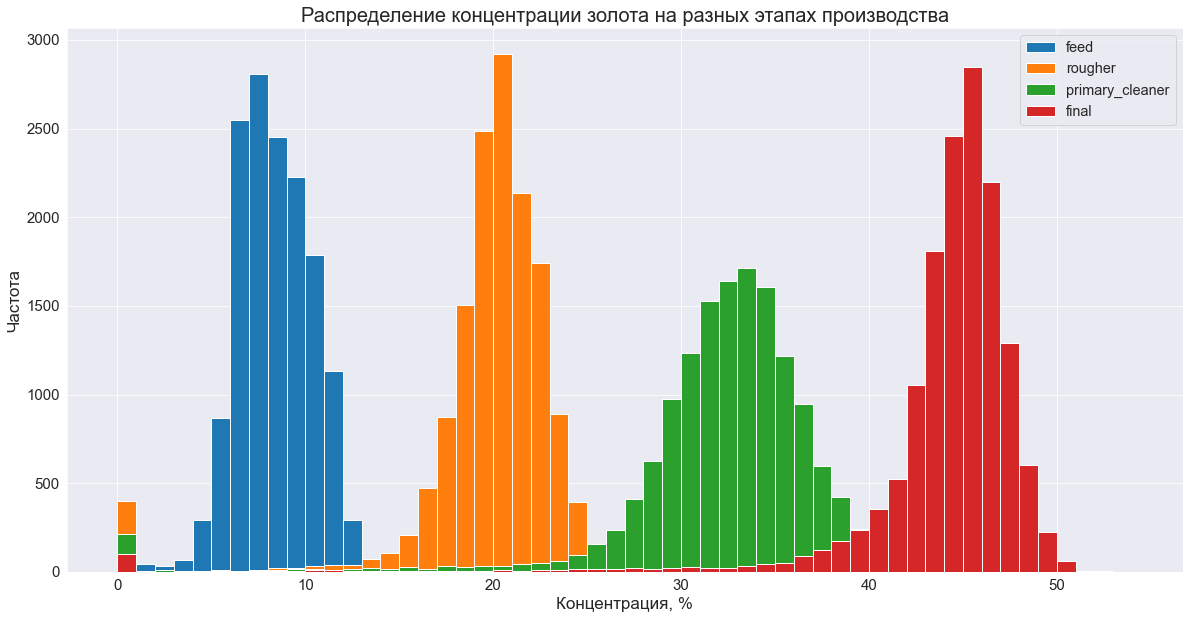

In [18]:
sns.set_style('darkgrid')
aurum_dynamics['feed'].hist(bins=range(0, 55), figsize=(20, 10), label = 'feed')
aurum_dynamics['rougher'].hist(bins=range(0, 55), figsize=(20, 10), label = 'rougher')
aurum_dynamics['primary_cleaner'].hist(bins=range(0, 55), figsize=(20, 10), label = 'primary_cleaner')
aurum_dynamics['final'].hist(bins=range(0, 55), figsize=(20, 10), label = 'final').tick_params(labelsize=15)

plt.legend(loc='upper right', fontsize='x-large')
plt.title('Распределение концентрации золота на разных этапах производства', fontsize=20)
plt.xlabel('Концентрация, %', fontsize=17)
plt.ylabel('Частота', fontsize=17);

На трёх этапах наблюдается значительное количество выбросов в районе нуля. Скорее всего, это некорректные данные, так как маловероятно, что металл будет практически отсутствовать в продукте. Удалим данные с околонулевыми значениями. Также, удалим их в тренировочных данных.

In [19]:
aurum_dynamics = aurum_dynamics.query('feed > 1 and rougher > 1 and primary_cleaner > 1 and final > 1')
data_train = data_train.loc[((data_train["rougher.input.feed_au"] > 1) & 
                            (data_train['rougher.output.concentrate_au'] > 1) & 
                            (data_train['primary_cleaner.output.concentrate_au'] > 1) & 
                            (data_train['final.output.concentrate_au'] > 1))]
aurum_dynamics.shape[0]

13878

Было удалено менее 700 строк, это не очень много.

Посмотрим на столбчатой диаграмме как меняется в среднем концентрация золота на разных этапах очистки:

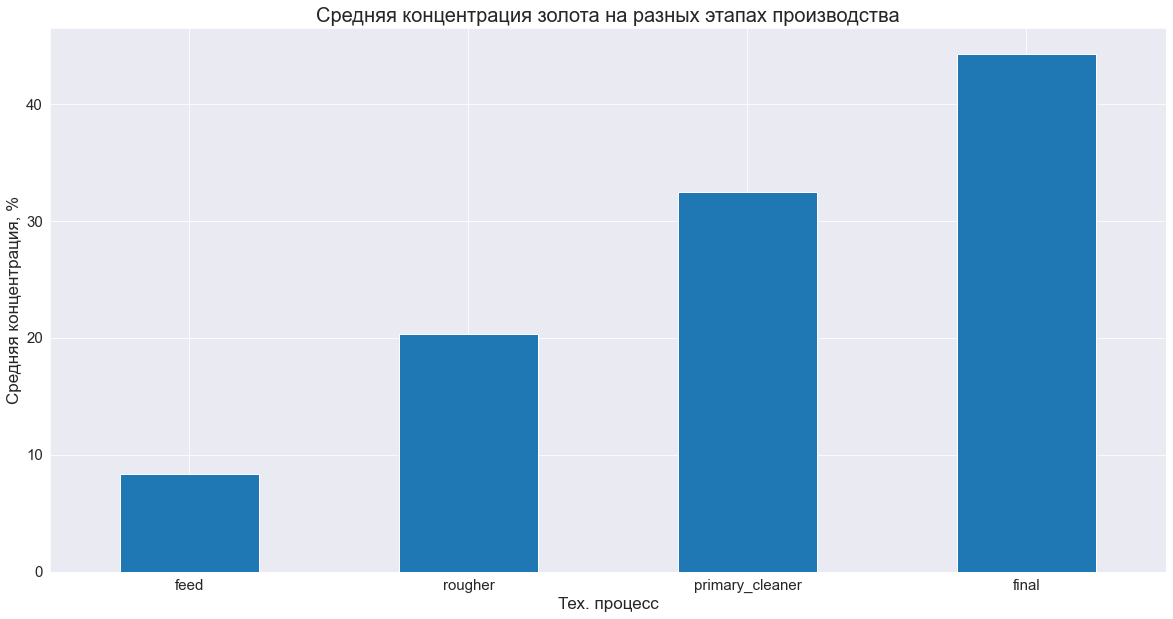

In [20]:
pd.Series([aurum_dynamics['feed'].mean(),
           aurum_dynamics['rougher'].mean(),
           aurum_dynamics['primary_cleaner'].mean(), 
           aurum_dynamics['final'].mean()], index=columns).plot.bar(rot=0, figsize=(20, 10)).tick_params(labelsize=15)

plt.title('Средняя концентрация золота на разных этапах производства', fontsize=20)
plt.ylabel('Средняя концентрация, %', fontsize=17)
plt.xlabel('Тех. процесс', fontsize=17);

Средняя концентрация золота после каждого этапа увеличивается, так и должно быть. По сравнению с сырьём, концентрация на финальном этапе выше примерно в 5 раз.

#### Серебро

Повторим те же действия с серебром:

In [21]:
argentum_dynamics = data_train[['rougher.input.feed_ag',
                            'rougher.output.concentrate_ag', 
                            'primary_cleaner.output.concentrate_ag', 
                            'final.output.concentrate_ag']]
argentum_dynamics = argentum_dynamics.rename(columns=dict(zip(argentum_dynamics.columns, columns)))

argentum_dynamics.sample(5, random_state=RANDOM_STATE)

,feed,rougher,primary_cleaner,final
11713,13.284014,14.062372,10.401505,5.733978
3271,11.075958,13.780462,8.808085,5.426224
11402,12.310330,15.318232,10.619396,8.150981
11205,9.879273,14.611309,8.398538,4.936683
5149,10.299057,14.313028,10.025918,5.770114


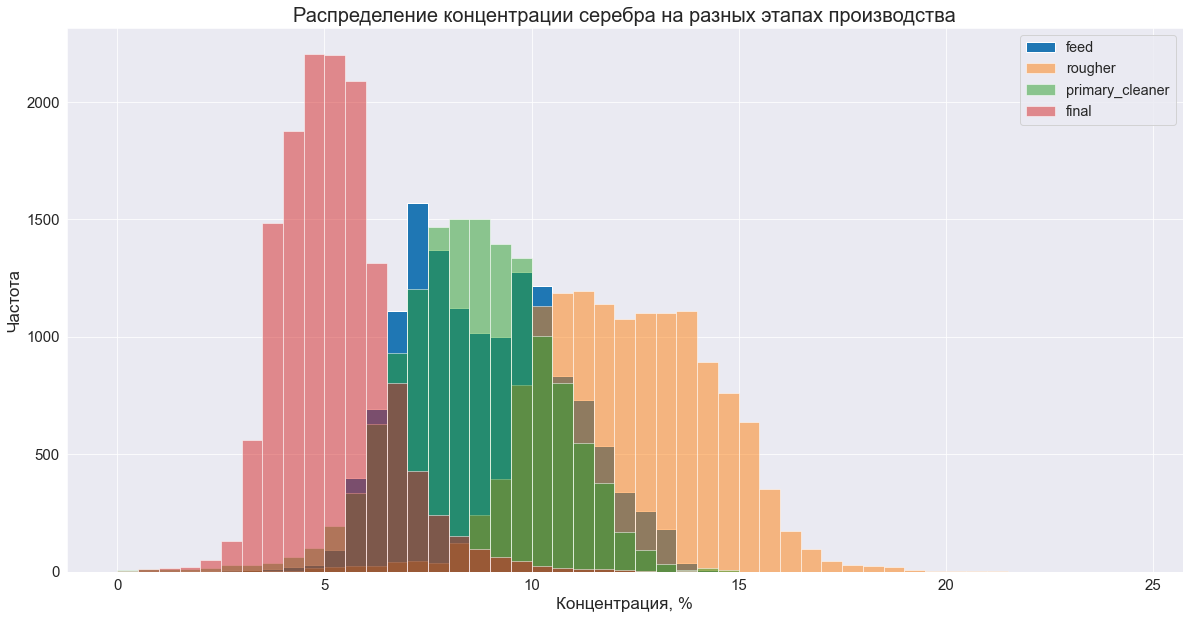

In [22]:
argentum_dynamics['feed'].hist(bins=np.arange(0, 25, 0.5), figsize=(20, 10), label = 'feed')
argentum_dynamics['rougher'].hist(bins=np.arange(0, 25, 0.5), figsize=(20, 10), label = 'rougher', alpha=0.5)
argentum_dynamics['primary_cleaner'].hist(bins=np.arange(0, 25, 0.5), figsize=(20, 10), label = 'primary_cleaner', alpha=0.5)
argentum_dynamics['final'].hist(bins=np.arange(0, 25, 0.5), figsize=(20, 10), label = 'final', alpha=0.5).tick_params(labelsize=15)

plt.legend(fontsize='x-large')
plt.title('Распределение концентрации серебра на разных этапах производства', fontsize=20)
plt.xlabel('Концентрация, %', fontsize=17)
plt.ylabel('Частота', fontsize=17);

In [23]:
argentum_dynamics = argentum_dynamics.query('feed > 1 and rougher > 1 and primary_cleaner > 1 and final > 1')
data_train = data_train.loc[((data_train["rougher.input.feed_ag"] > 1) & 
                            (data_train['rougher.output.concentrate_ag'] > 1) & 
                            (data_train['primary_cleaner.output.concentrate_ag'] > 1) & 
                            (data_train['final.output.concentrate_ag'] > 1))]
argentum_dynamics.shape[0]

13844

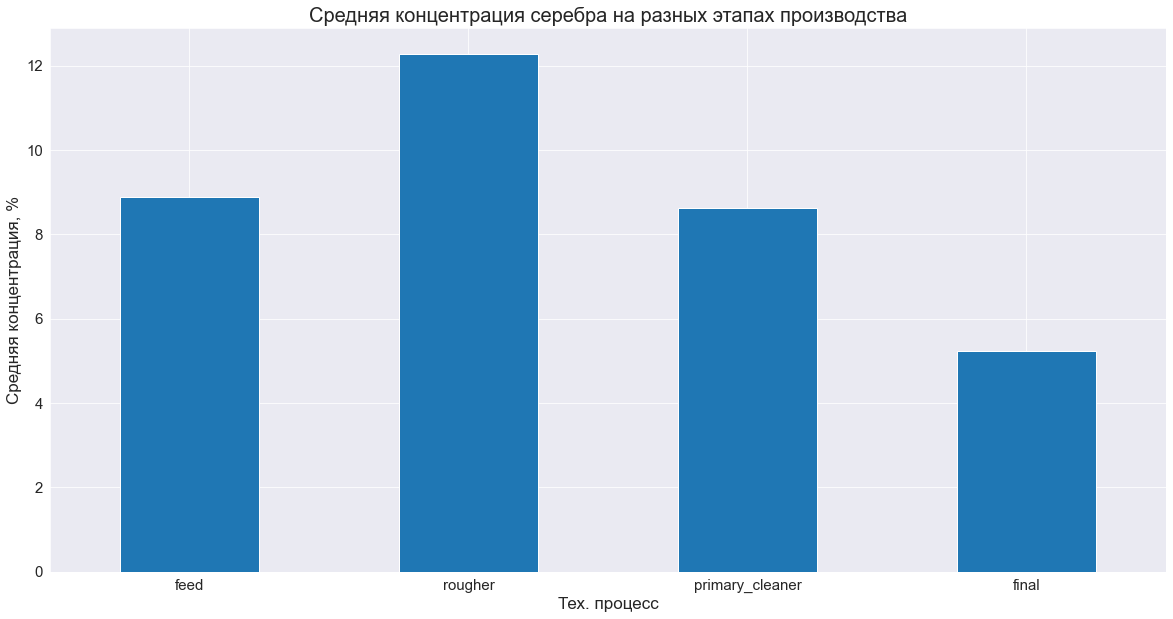

In [24]:
pd.Series([argentum_dynamics['feed'].mean(),
           argentum_dynamics['rougher'].mean(),
           argentum_dynamics['primary_cleaner'].mean(), 
           argentum_dynamics['final'].mean()], index=columns).plot.bar(rot=0, figsize=(20, 10)).tick_params(labelsize=15)

plt.title('Средняя концентрация серебра на разных этапах производства', fontsize=20)
plt.ylabel('Средняя концентрация, %', fontsize=17)
plt.xlabel('Тех. процесс', fontsize=17);

Как мы видим, концентрация серебра увеличивается после флотации, судя по всему, на этом этапе отсеиваются другие вещества. Но в дальнейшем, после каждой из очисток, средняя концентрация уменьшается, значит именно на этих этапах отсеивается серебро.

#### Свинец

Таким же образом проверим свинец:

In [25]:
plumbum_dynamics = data_train[['rougher.input.feed_pb',
                            'rougher.output.concentrate_pb', 
                            'primary_cleaner.output.concentrate_pb', 
                            'final.output.concentrate_pb']]
plumbum_dynamics = plumbum_dynamics.rename(columns=dict(zip(plumbum_dynamics.columns, columns)))

plumbum_dynamics.sample(5, random_state=RANDOM_STATE)

,feed,rougher,primary_cleaner,final
366,2.577385,7.293399,7.321857,9.393074
13147,2.473555,5.595034,10.111752,9.271974
2733,2.166721,6.120971,8.350064,8.753140
13286,3.247993,3.020574,9.984785,10.654721
14142,4.635715,11.702296,15.106622,12.115716


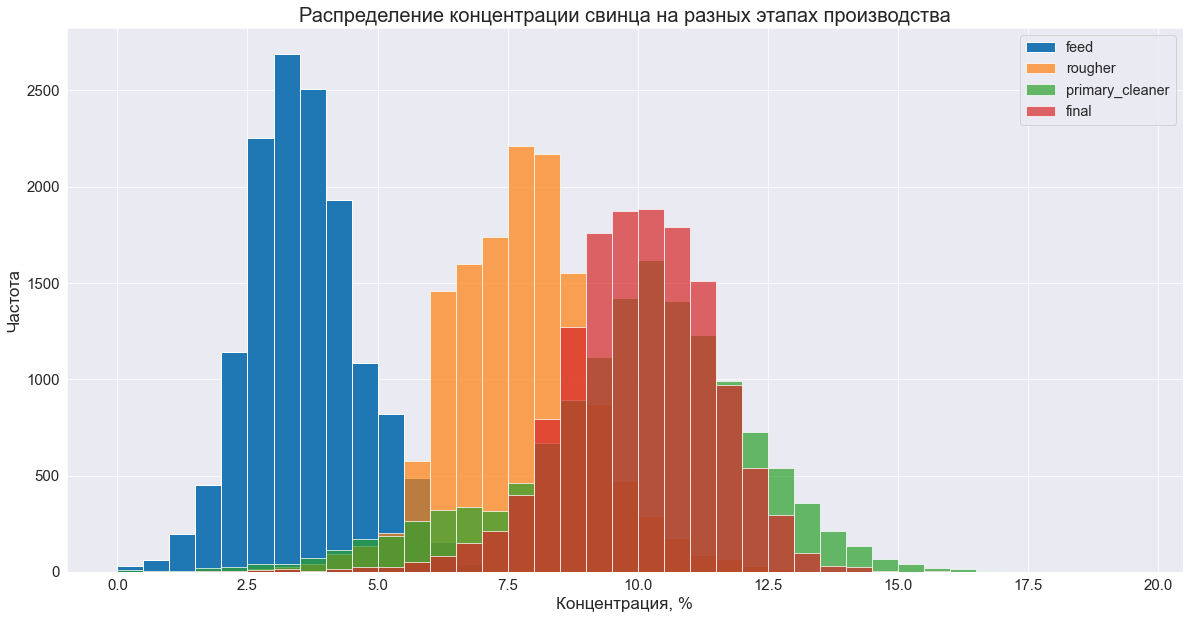

In [26]:
plumbum_dynamics['feed'].hist(bins=np.arange(0, 20, 0.5), figsize=(20, 10), label = 'feed')
plumbum_dynamics['rougher'].hist(bins=np.arange(0, 20, 0.5), figsize=(20, 10), label = 'rougher', alpha=0.7)
plumbum_dynamics['primary_cleaner'].hist(bins=np.arange(0, 20, 0.5), figsize=(20, 10), label = 'primary_cleaner', alpha=0.7)
plumbum_dynamics['final'].hist(bins=np.arange(0, 20, 0.5), figsize=(20, 10), label = 'final', alpha=0.7).tick_params(labelsize=15)

plt.legend(fontsize='x-large')
plt.title('Распределение концентрации свинца на разных этапах производства', fontsize=20)
plt.xlabel('Концентрация, %', fontsize=17)
plt.ylabel('Частота', fontsize=17);

In [27]:
plumbum_dynamics = plumbum_dynamics.query('feed > 1 and rougher > 1 and primary_cleaner > 1 and final > 1')
data_train = data_train.loc[((data_train["rougher.input.feed_pb"] > 1) & 
                            (data_train['rougher.output.concentrate_pb'] > 1) & 
                            (data_train['primary_cleaner.output.concentrate_pb'] > 1) & 
                            (data_train['final.output.concentrate_pb'] > 1))]
plumbum_dynamics.shape[0]

13748

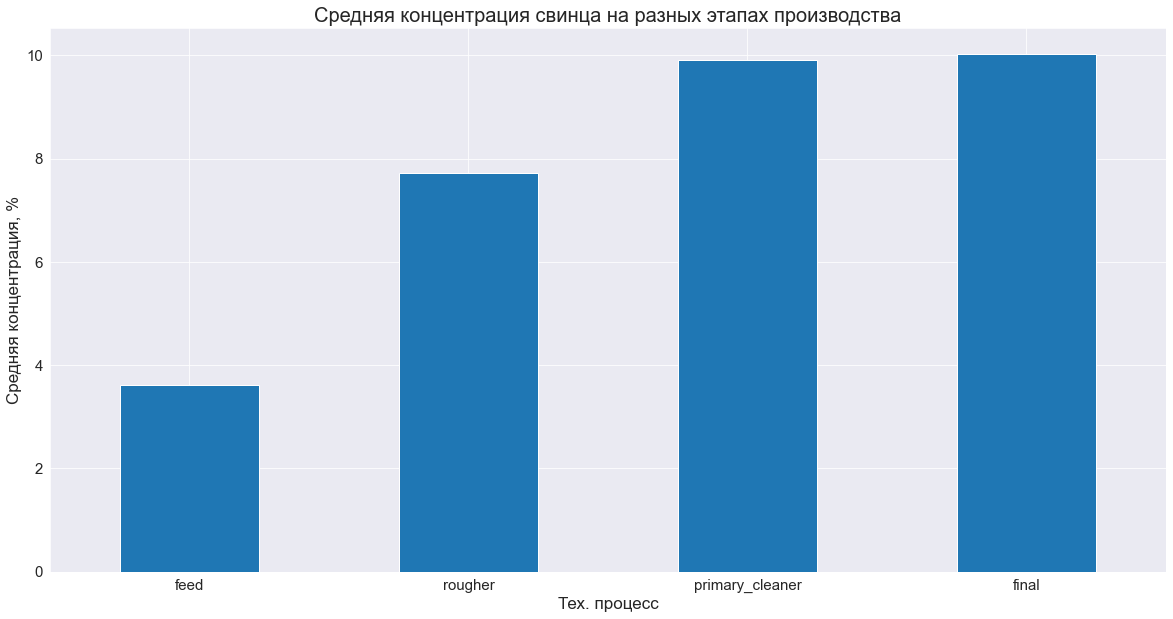

In [28]:
pd.Series([plumbum_dynamics['feed'].mean(),
           plumbum_dynamics['rougher'].mean(),
           plumbum_dynamics['primary_cleaner'].mean(), 
           plumbum_dynamics['final'].mean()], index=columns).plot.bar(rot=0, figsize=(20, 10)).tick_params(labelsize=15)

plt.title('Средняя концентрация свинца на разных этапах производства', fontsize=20)
plt.ylabel('Средняя концентрация, %', fontsize=17)
plt.xlabel('Тех. процесс', fontsize=17);

По диаграмме видно, что концентрация свинца увеличивается на протяжении всего производства. Судя по всему, такова техническая особенность процесса.

### Распределение размеров гранул сырья

Проверим распределение размеров гранул сырья. Для этого построим графики распределения для признаков `'rougher.input.feed_size'` и `'primary_cleaner.input.feed_size'` на тренировочных и тестовых данных.

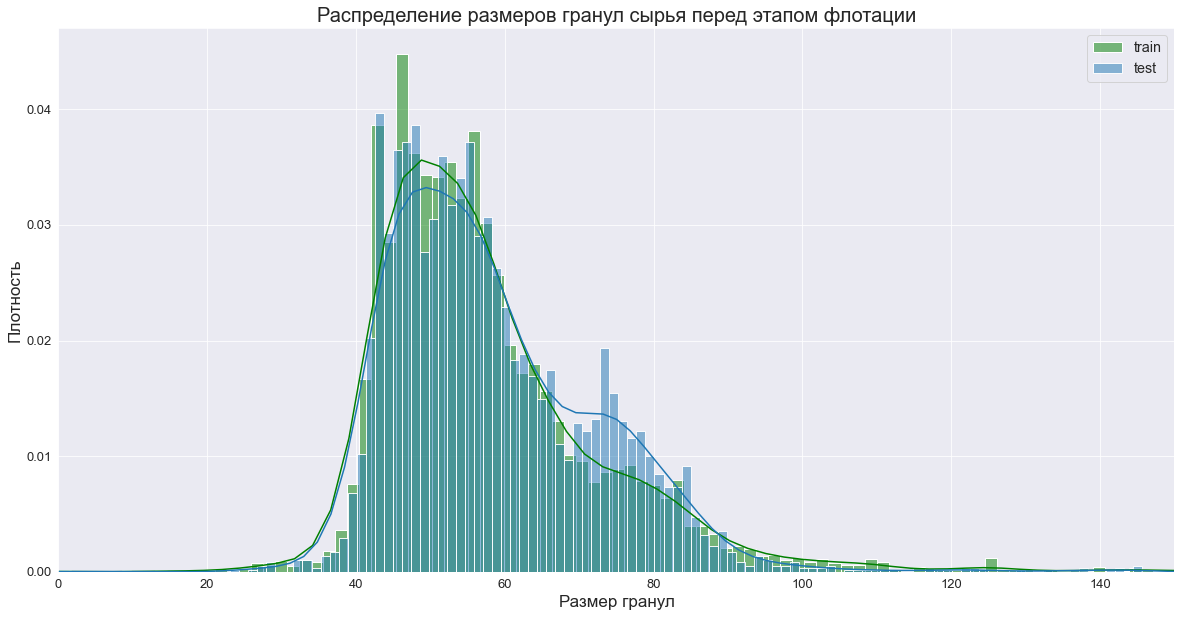

In [29]:
f, ax = plt.subplots(figsize=(20, 10))
plt.xlim(0, 150)

sns.histplot(x='rougher.input.feed_size',
             stat="density",
             bins=300,
             data=data_train,
             color='green',
             kde=True,
             label='train')

sns.histplot(x='rougher.input.feed_size',
             stat="density",
             bins=300,
             data=data_test,
             kde=True,
             alpha=0.5,
             label='test').tick_params(labelsize=13)

plt.legend(fontsize='x-large')
plt.title('Распределение размеров гранул сырья перед этапом флотации', fontsize=20)
plt.xlabel('Размер гранул', fontsize=17)
plt.ylabel('Плотность', fontsize=17);

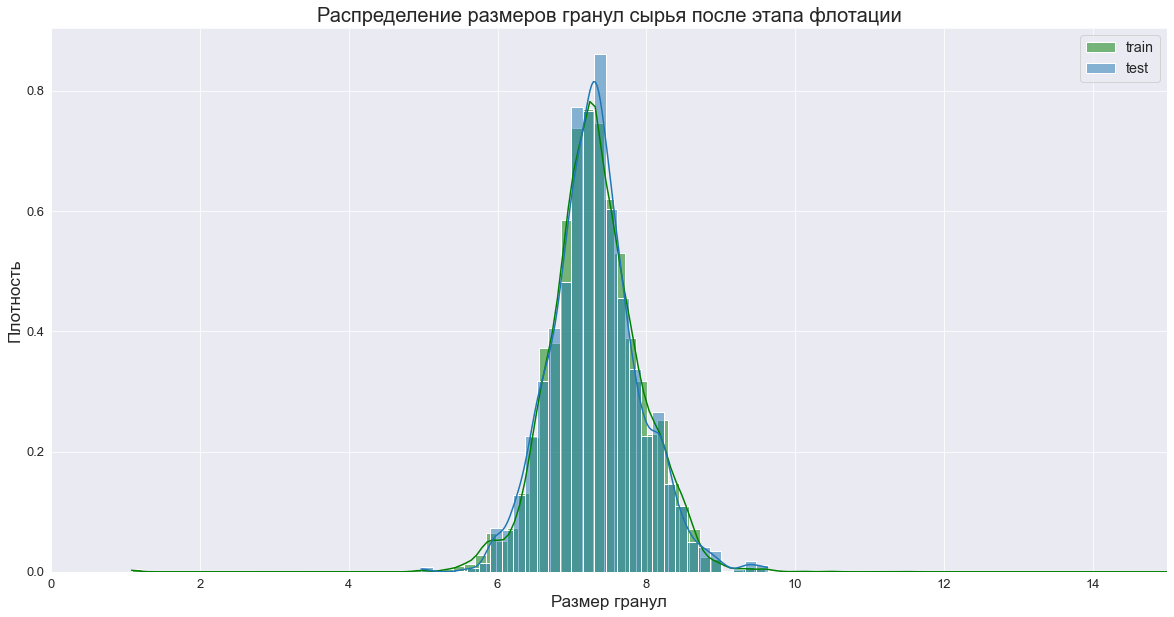

In [30]:
f, ax = plt.subplots(figsize=(20, 10))
sns.set_style('darkgrid')
plt.xlim(0, 15)

sns.histplot(x='primary_cleaner.input.feed_size',
             stat="density",
             bins=100,
             data=data_train,
             color='green',
             kde=True,
             label='train')

sns.histplot(x='primary_cleaner.input.feed_size',
             stat="density",
             bins=30,
             data=data_test,
             kde=True,
             alpha=0.5,
             label='test').tick_params(labelsize=13)

plt.legend(fontsize='x-large')
plt.title('Распределение размеров гранул сырья после этапа флотации', fontsize=20)
plt.xlabel('Размер гранул', fontsize=17)
plt.ylabel('Плотность', fontsize=17);

В самом начале процесса, до флотации, размер гранул может варьироваться, видно, что распределения немного отличаются. У распределения на тестовой выборке немного смещён пик, но сами распределения выглядят схожими. 

По графику видно, что после флотации размер гранул приводится к единому стандарту: распределения на выборках стали практически идентичными.

### Суммарная концентрация всех веществ

Посмотрим как меняется суммарная концентрация веществ на разных этапах:

In [31]:
concentrate_sum = pd.DataFrame()
concentrate_sum['feed'] = (data_train['rougher.input.feed_ag'] +
                           data_train['rougher.input.feed_au'] +
                           data_train['rougher.input.feed_pb'] +
                           data_train['rougher.input.feed_sol'])

concentrate_sum['rougher'] = (data_train['rougher.output.concentrate_ag'] +
                           data_train['rougher.output.concentrate_au'] +
                           data_train['rougher.output.concentrate_pb'] +
                           data_train['rougher.output.concentrate_sol'])

concentrate_sum['primary_cleaner'] = (data_train['primary_cleaner.output.concentrate_ag'] +
                           data_train['primary_cleaner.output.concentrate_au'] +
                           data_train['primary_cleaner.output.concentrate_pb'] +
                           data_train['primary_cleaner.output.concentrate_sol'])

concentrate_sum['final'] = (data_train['final.output.concentrate_ag'] +
                           data_train['final.output.concentrate_au'] +
                           data_train['final.output.concentrate_pb'] +
                           data_train['final.output.concentrate_sol'])

concentrate_sum.sample(5, random_state=RANDOM_STATE)

,feed,rougher,primary_cleaner,final
5633,56.857659,75.810667,59.008354,72.008018
5052,50.508040,70.528252,55.533793,73.050283
985,53.413709,51.429728,61.679439,62.863227
6792,54.234146,71.298505,53.521832,68.381592
2857,59.722793,70.776287,64.329499,74.050366


Построим гистограммы для распределений суммарной концентрации:

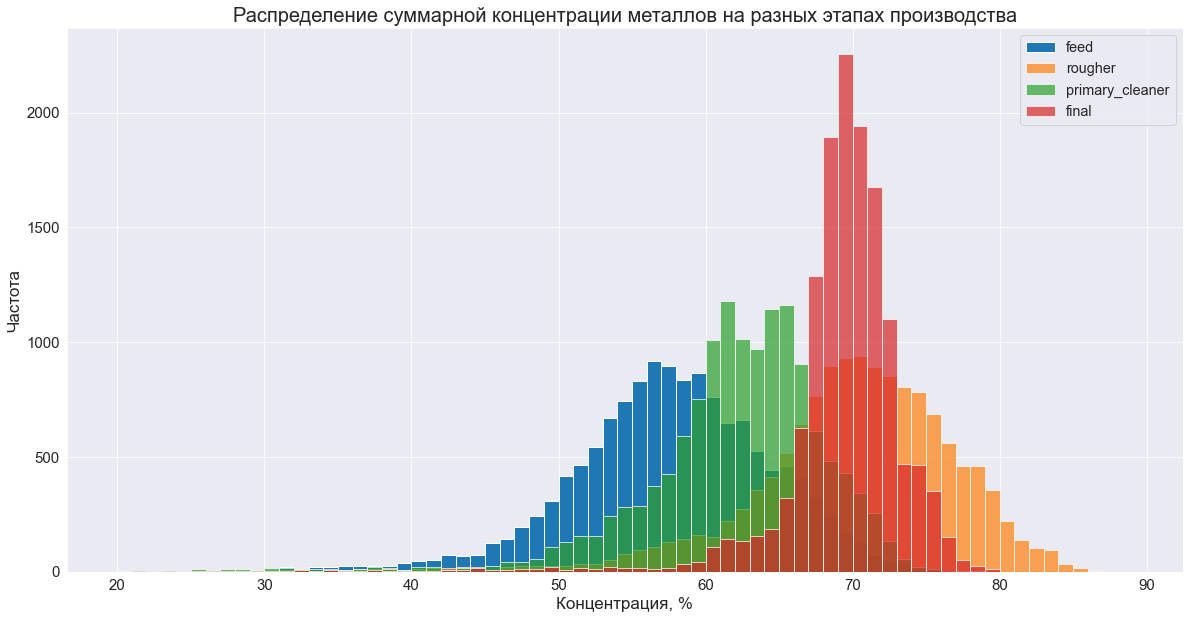

In [32]:
concentrate_sum['feed'].hist(bins=np.arange(20, 90, 1), figsize=(20, 10), label = 'feed')
concentrate_sum['rougher'].hist(bins=np.arange(20, 90, 1), figsize=(20, 10), label = 'rougher', alpha=0.7)
concentrate_sum['primary_cleaner'].hist(bins=np.arange(20, 90, 1), figsize=(20, 10), label = 'primary_cleaner', alpha=0.7)
concentrate_sum['final'].hist(bins=np.arange(20, 90, 1), figsize=(20, 10), label = 'final', alpha=0.7).tick_params(labelsize=15)

plt.legend(fontsize='x-large')
plt.title('Распределение суммарной концентрации металлов на разных этапах производства', fontsize=20)
plt.xlabel('Концентрация, %', fontsize=17)
plt.ylabel('Частота', fontsize=17);

Посмотрим на столбчатой диаграмме средние значения суммарной концентрации на различных этапах:

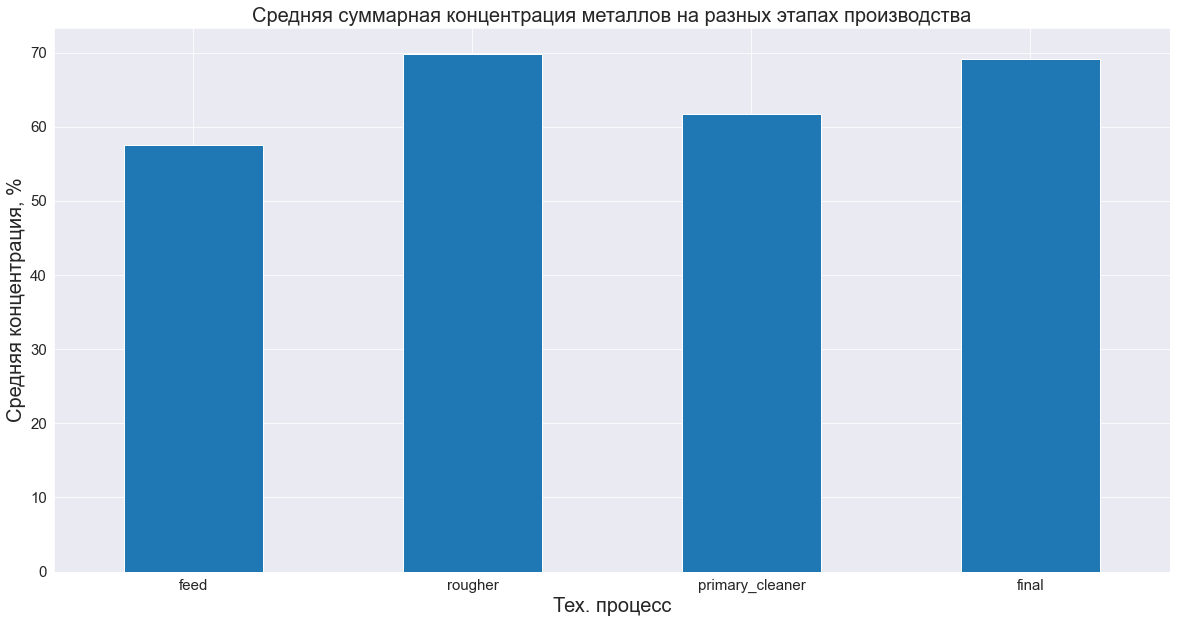

In [33]:
pd.Series([concentrate_sum['feed'].mean(),
           concentrate_sum['rougher'].mean(),
           concentrate_sum['primary_cleaner'].mean(), 
           concentrate_sum['final'].mean()], index=concentrate_sum.columns).plot.bar(rot=0, figsize=(20, 10)).tick_params(labelsize=15)

plt.title('Средняя cуммарная концентрация металлов на разных этапах производства', fontsize=20)
plt.ylabel('Средняя концентрация, %', fontsize=20)
plt.xlabel('Тех. процесс', fontsize=20);

Суммарная концентрация веществ меняется на различных этапах, но выраженной закономерности не наблюдается. На этапе сырья суммарная концентрация металлов минимальна, а больше всего она после этапа флотации. Также, можно отметить, что на финальном этапе суммарная концентрация лежит в гораздо меньшем диапазоне. Для большей части наблюдений она находится в районе 70%. Это значит, что к финальному этапу сырьё приводится к заранее определённым параметрам.

## Модель

### Функция для подсчёта метрики sMAPE

Напишем функцию `smape()` для подсчёта метрики sMAPE. Функция будет принимать в себя фактические значения и предсказания а возвращать значение метрики sMAPE. С помощью функции `make_scorer()` сделаем из неё скорер для `GridSearchCV()`.

In [34]:
def smape(target, preds):
    return 1 / len(target) * np.sum(np.abs(target - preds) * 2 / (np.abs(target) + np.abs(preds)) * 100)
    
smape_scorer = make_scorer(smape, greater_is_better=False)

### Создание обучающих и тестовых выборок

Запишем обучающие и тестовые выборки в переменные: 
* Из `train_features` удалим столбцы, которых нет в тестовой выборке, а также строковый столбец `date`
* Создадим две переменные с целевыми признаками: `train_target_rougher` и `train_target_final`
* Из тестовой выборки также удалим столбец `date`
* В переменные `test_target_rougher` и `test_target_final` запишем целевые признаки. Их мы возьмём из фрейма `data_full` и присоединим к `data_test` по столбцу с датой, а потом удалим все остальные признаки кроме целевого. Таким образом мы возьмём из `data_full` только те целевые данные, которые есть в `data_test`

In [35]:
train_features = data_train.drop(missing_features, axis=1).drop('date', axis=1)
train_target_rougher = data_train['rougher.output.recovery']
train_target_final = data_train['final.output.recovery']

test_features = data_test.drop('date', axis=1)
test_target_rougher = (data_test
                       .merge(data_full[['date', 'rougher.output.recovery']], on='date')['rougher.output.recovery'])
test_target_final = (data_test
                       .merge(data_full[['date', 'final.output.recovery']], on='date')['final.output.recovery'])

### Обучение и проверка моделей

#### `DummyRegressor()`

Чтобы проверить наши модели на адекватность, посмотрим какую метрику sMAPE будет выдавать фиктивный регрессор, который будет заполнять всё средним значением.

In [36]:
dummy_model_rougher = DummyRegressor(strategy = 'mean' ).fit(train_features, train_target_rougher)
dummy_model_final = DummyRegressor(strategy = 'mean' ).fit(train_features, train_target_final)

dummy_preds_rougher = dummy_model_rougher.predict(test_features)
dummy_preds_final = dummy_model_final.predict(test_features)

dummy_smape_rougher = smape(test_target_rougher, dummy_preds_rougher)
dummy_smape_final = smape(test_target_final, dummy_preds_final)

print('sMAPE фиктивного регрессора на признаке "rougher":', dummy_smape_rougher)
print('sMAPE фиктивного регрессора на признаке "final":', dummy_smape_final)
print('Итоговое sMAPE фиктивного регрессора: ', 0.25 * dummy_smape_rougher + 0.75 * dummy_smape_final)

sMAPE фиктивного регрессора на признаке "rougher": 6.08433245567493
sMAPE фиктивного регрессора на признаке "final": 9.24740114153859
Итоговое sMAPE фиктивного регрессора:  8.456633970072676


Зафиксировали.

#### `LinearRegression()`

Обучим с помощью перебора гиперпараметров по сетке модель линейной регрессии. `GridSearchCV()` выдаст нам лучшую метрику по итогам кросс-валидации и гиперпараметры лучшей модели. Создадим две модели, т.к. нам нужно предсказывать два признака.

In [37]:
lr_model = LinearRegression(fit_intercept=True)

params = {}
lr_search = GridSearchCV(lr_model, params, n_jobs=-1, cv=5, scoring=smape_scorer)
lr_search_final = lr_search.fit(train_features, train_target_final)

In [38]:
lr_search = GridSearchCV(lr_model, params, n_jobs=-1, cv=5, scoring=smape_scorer)
lr_search_rougher = lr_search.fit(train_features, train_target_rougher)

In [39]:
print((f'Лучшая метрика предсказания "rougher": {abs(lr_search_rougher.best_score_)}\n'))
print((f'Лучшая метрика предсказания "final": {abs(lr_search_final.best_score_)}\n'))
print(f'Итоговое sMAPE на лучших моделях: {0.25 * abs(lr_search_rougher.best_score_) + 0.75 * abs(lr_search_final.best_score_)}')

Лучшая метрика предсказания "rougher": 7.039551301741604

Лучшая метрика предсказания "final": 9.390440088865436

Итоговое sMAPE на лучших моделях: 8.802717892084477


Модель линейной регрессии немного хуже фиктивного регрессора. Посмотрим на модели дерева и случайного леса. 

#### `DecisionTreeRegressor()`

In [40]:
%%time
tree_model = DecisionTreeRegressor(random_state=RANDOM_STATE)
params = {'max_depth': np.arange(1, 20)}

tree_search = GridSearchCV(tree_model, params, n_jobs=-1, cv=5, scoring=smape_scorer)
tree_search_final = tree_search.fit(train_features, train_target_final)

CPU times: total: 750 ms
Wall time: 12.2 s


In [41]:
%%time

tree_search = GridSearchCV(tree_model, params, n_jobs=-1, cv=5, scoring=smape_scorer)
tree_search_rougher = tree_search.fit(train_features, train_target_rougher)

CPU times: total: 484 ms
Wall time: 10.9 s


In [42]:
print(f'Лучшая метрика предсказания "rougher": {abs(tree_search_rougher.best_score_)} при значении гиперпараметров {tree_search_rougher.best_params_}\n')
print(f'Лучшая метрика предсказания "final": {abs(tree_search_final.best_score_)} при значении гиперпараметров {tree_search_final.best_params_}\n')
print(f'Итоговое sMAPE на лучших моделях: {0.25 * abs(tree_search_rougher.best_score_) + 0.75 * abs(tree_search_final.best_score_)}')

Лучшая метрика предсказания "rougher": 6.709431559814497 при значении гиперпараметров {'max_depth': 4}

Лучшая метрика предсказания "final": 8.717082842075543 при значении гиперпараметров {'max_depth': 2}

Итоговое sMAPE на лучших моделях: 8.215170021510282


Модель дерева выдала значение немного лучше. Осталось проверить только случайный лес.

#### `RandomForestRegressor()`

In [43]:
%%time

rfr_model = RandomForestRegressor(random_state=RANDOM_STATE)
params = {'n_estimators': [30, 60, 90, 120], 
          'max_depth': [2, 6, 10, 14, 18]}

rfr_search = GridSearchCV(rfr_model, params, n_jobs=-1, cv=5, scoring=smape_scorer)
rfr_search_final = rfr_search.fit(train_features, train_target_final)

CPU times: total: 4.11 s
Wall time: 10min 32s


In [44]:
%%time
rfr_search = GridSearchCV(rfr_model, params, n_jobs=-1, cv=5, scoring=smape_scorer)
rfr_search_rougher = rfr_search.fit(train_features, train_target_rougher)

CPU times: total: 10.3 s
Wall time: 7min 17s


In [45]:
print((f'Лучшая метрика предсказания "rougher": {abs(rfr_search_rougher.best_score_)} при значении гиперпараметров {rfr_search_rougher.best_params_}\n'))
print((f'Лучшая метрика предсказания "final": {abs(rfr_search_final.best_score_)} при значении гиперпараметров {rfr_search_final.best_params_}\n'))
print(f'Итоговое sMAPE на лучших моделях: {0.25 * abs(rfr_search_rougher.best_score_) + 0.75 * abs(rfr_search_final.best_score_)}')

Лучшая метрика предсказания "rougher": 6.214113496803757 при значении гиперпараметров {'max_depth': 6, 'n_estimators': 30}

Лучшая метрика предсказания "final": 8.63822273767668 при значении гиперпараметров {'max_depth': 2, 'n_estimators': 30}

Итоговое sMAPE на лучших моделях: 8.032195427458449


Моделью с лучшей метрикой после кросс-валидации оказалась модель случайного леса с глубиной 6 и количеством деревьев - 30.

### Проверка на тестовых данных

Проверим нашу лучшую модель на тестовых данных:

In [46]:
test_preds_rougher = rfr_search_rougher.best_estimator_.predict(test_features)
test_preds_final = rfr_search_final.best_estimator_.predict(test_features)

smape_rougher = smape(test_target_rougher, test_preds_rougher)
smape_final = smape(test_target_final, test_preds_final)

print('sMAPE("rougher") лучшей модели на тестовых данных:', smape_rougher)
print('sMAPE("final") лучшей модели на тестовых данных:', smape_final)
print('Итоговое sMAPE на тестовых данных: ', 0.25 * smape_rougher + 0.75 * smape_final)

sMAPE("rougher") лучшей модели на тестовых данных: 3.692218669548327
sMAPE("final") лучшей модели на тестовых данных: 8.553674890624853
Итоговое sMAPE на тестовых данных:  7.338310835355721


Общая метрика стала немного лучше на тестовых данных, а также ошибка ниже, чем на фиктивном регрессоре. Модель выполнила свою задачу.

## Вывод

В ходе работы над проектом были предобработаны "сырые" данные о процессе очистки золота. Была проанализированна динамика изменения концентрации металлов, распределение размеров гранул и суммарная концентрация металлов. Было обучено несколько моделей, которые предсказывают эффективность обогащения лучше случайного регрессора. 